In [30]:
import numpy as np
import pandas as pd
import math
import cmath
from scipy.optimize import root
from scipy.integrate import odeint
from __future__ import division
from scipy import *
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

import pylab as pp
from scipy import integrate, interpolate
from scipy import optimize

# Evaluation des modèles pour l'extraction supercritique

L'extraction supercritique est de plus en plus utilisée afin de retirer des matières organiques de différents liquides ou matrices solides. Cela est dû au fait que les fluides supercritiques ont des avantages non négligeables par rapport aux autres solvants, ils ont des caractèreistiques comprises entre celles des gaz et celles des solides. En changeant la température et la pression ils peuvent capter des composés différents, ils sont donc très efficaces. 
Le méchanisme de l'extraction supercritique est le suivant : 
- Transport du fluide vers la particule, en premier lieu sur sa surface et en deuxième lieu a l'intérieur de la particule par diffusion
- Dissolution du soluté avec le fluide supercritique 
- Transport du solvant de l'intérieur vers la surface de la particule 
- Transport du solvant et des solutés de la surface de la particule vers la masse du solvant 

A - Le modèle de Reverchon : 
    
Afin d'utiliser ce modèle, définissons les variables qui vont y être admises, ci-dessous la nomenclature du modèle :
    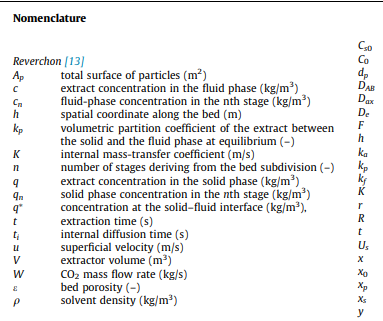
    
Le modèle : 
Il est basé sur l'intégration des bilans de masses différentielles tout le long de l'extraction, avec les hypothèses suivants : 
- L'écoulement piston existe à l'intérieur du lit, comme le montre le schéma ci-contre : 
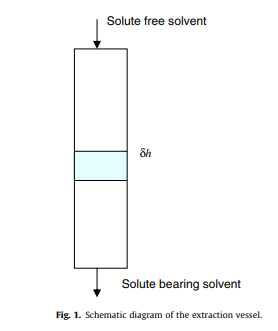
- La dispersion axiale du lit est négligeable
- Le débit, la température et la pression sont constants

Cela nous permet d'obtenir les équations suivantes :
- $uV.\frac{\partial c_{c}}{\partial t}+eV.\frac{\partial c_{c}}{\partial t}+ AK(q-q*) = 0$
- $(1-e).V.uV*\frac{\partial c_{q}}{\partial t}= -AK(q-q*)$

- Les conditions initiales sont les suivantes : C = 0, q=q0 à t = 0 et c(0,t) à h=0

La phase d'équilibre est : $c = k.q*$

Sachant que le fluide et la phase sont uniformes à chaque stage, nous pouvons définir le modèle en utilisant les équations différentielles ordinaires (2n). Les équations sont les suivantes :
-  $(\frac{W}{p}).(Cn- Cn-1) + e (\frac{v}{n}).(\frac{dcn}{dt})+(1-e).(\frac{v}{n}).(\frac{dcn}{dt}) = 0$
- $(\frac{dqn}{dt} = - (\frac{1}{ti})(qn-qn*)$
- Les conditions initiales sont : cn = 0, qn = q0 à t = 0 

# Ejemplo ODE

In [5]:
import numpy as np
from scipy import integrate
from matplotlib.pylab import *

# Ejemplo 2 funciona

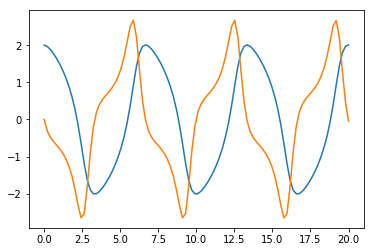

In [6]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def vdp1(t, y):
    return np.array([y[1], (1 - y[0]**2)*y[1] - y[0]])

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution
y0 = [2, 0]                   # initial value
y = np.zeros((len(t), len(y0)))   # array for solution
y[0, :] = y0

r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values

for i in range(1, t.size):
   y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")

plt.plot(t, y)
plt.show()

# Table 

In [7]:
def table(self):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-7-7759a876d43d>, line 2)

# Fonction 

In [28]:
def fonction1 (n,v,W,p,E,dqn,qt):
    return ( W / p ) *(c - c[1]) + E * (v / n) + (1 - E) * (v / n) * (dqn / dt) == (dcn / dt )
n = 10 
v = 2.31E-5
E = 0.4
dqn = 0.5
dt = 0.5
W = 0.0001471667
p = 285
t0, t1 = 0, 20
t = np.linspace(t0, t1, 100)  
c0 = [0, 10]                  
c = np.zeros((len(t), len(y0))) 
c[0, :] = c0
r = integrate.ode(fonction1).set_integrator("dopri5")  
r.set_initial_value(c0, t0)   
for i in range(1, t.size):
   c[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")

plt.plot(t, c)
plt.show()

# def fonction2 (t,q):
#     return (dqn / dt) == (-1 /ti ) * (q -q[1])
# dqn = 0.1
# ti = 10
# t0, t1 = 0, 20
# t = np.linspace(t0, t1, 100)  
# q0 = [2, 0]                  
# q = np.zeros((len(t), len(y0))) 
# q[0, :] = q0
# r = integrate.ode(fonction2).set_integrator("dopri5")  
# r.set_initial_value(y0, t0)   
# for i in range(1, t.size):
#    q[i, :] = r.integrate(t[i]) # get one more value, add it to the array
#    if not r.successful():
#        raise RuntimeError("Could not integrate")

# plt.plot(t, q)
# plt.show()

# def fonction3 (self):
#     return cc == k * q1
# k = 0.2
# q1 = 1
# t0, t1 = 0, 20
# t = np.linspace(t0, t1, 100)  
# cc0 = [2, 0]                  
# cc = np.zeros((len(t), len(y0))) 
# cc[0, :] = cc0
# plt.plot(t, cc)
# plt.show()

error: failed in processing argument list for call-back fcn.

# Modelo Reverchon

Mathematical Modeling of Supercritical Extraction of Sage Oil 

In [43]:
P = 9 #MPa
T = 323 # K
Q = 8.83 #g/min
e = 0.4
rho = 285 #kg/m3
miu = 2.31e-5 # Pa*s
dp = 0.75e-3 # m
Dl = 0.24e-5 #m2/s
De = 8.48e-12 # m2/s
Di = 6e-13
u = 0.455e-3 #m/s
kf = 1.91e-5 #m/s
de = 0.06 # m
W = 0.160 # kg
kp = 0.2

r = 0.31 #m

n = 10
V = 12

#C = kp * qE
C = 0.1
qE = C / kp

Cn = 0.05
Cm = 0.02


t = np.linspace(0,10, 1)

ti = (r ** 2) / (15 * Di)


In [54]:
def reverchon(x,t):
    
    #Ecuaciones diferenciales del modelo Reverchon    
    #dCdt = - (n/(e * V)) * (W * (Cn - Cm) / rho + (1 - e) * V * dqdt)
    #dqdt = - (1 / ti) * (q - qE)
    
    q = x[0]
    C = x[1]
    qE = C / kp
    dqdt = - (1 / ti) * (q - qE)
    dCdt = - (n/(e * V)) * (W * (C - Cm) / rho + (1 - e) * V * dqdt)
    
    return [dqdt, dCdt]  


In [55]:
reverchon([1, 2], 0)

[8.428720083246617e-10, -0.0023158021167643352]

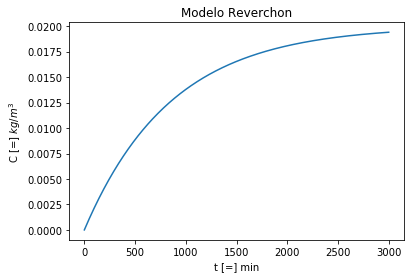

In [84]:
x0 = [0, 0]
t = np.linspace(0, 3000, 500)

resultado = odeint(reverchon, x0, t)

qR = resultado[:, 0]
CR = resultado[:, 1]
plt.plot(t, CR)
plt.title("Modelo Reverchon")
plt.xlabel("t [=] min")
plt.ylabel("C [=] $kg/m^3$")

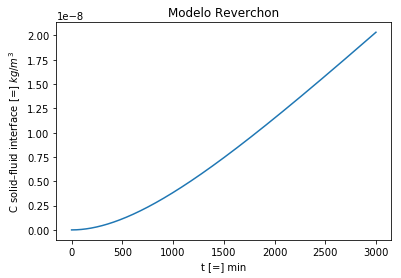

In [90]:
x0 = [0, 0]
t = np.linspace(0, 3000, 500)

resultado = odeint(reverchon, x0, t)

qR = resultado[:, 0]
CR = resultado[:, 1]
plt.plot(t, qR)
plt.title("Modelo Reverchon")
plt.xlabel("t [=] min")
plt.ylabel("C solid–fluid interface [=] $kg/m^3$")

In [57]:
print(CR)

[ 0.2         0.19995782  0.19991564  0.19987347  0.19983132  0.19978917
  0.19974704  0.19970491  0.1996628   0.19962069  0.1995786   0.19953651
  0.19949443  0.19945237  0.19941031  0.19936826  0.19932623  0.1992842
  0.19924218  0.19920017  0.19915818  0.19911619  0.19907421  0.19903224
  0.19899029  0.19894834  0.1989064   0.19886447  0.19882255  0.19878064
  0.19873874  0.19869685  0.19865497  0.1986131   0.19857124  0.19852939
  0.19848755  0.19844572  0.1984039   0.19836209  0.19832029  0.1982785
  0.19823672  0.19819495  0.19815318  0.19811143  0.19806969  0.19802796
  0.19798623  0.19794452  0.19790282  0.19786112  0.19781944  0.19777777
  0.1977361   0.19769445  0.1976528   0.19761117  0.19756954  0.19752793
  0.19748632  0.19744473  0.19740314  0.19736156  0.19732     0.19727844
  0.19723689  0.19719536  0.19715383  0.19711231  0.1970708   0.1970293
  0.19698782  0.19694634  0.19690487  0.19686341  0.19682196  0.19678052
  0.19673909  0.19669767  0.19665626  0.19661485  0.19

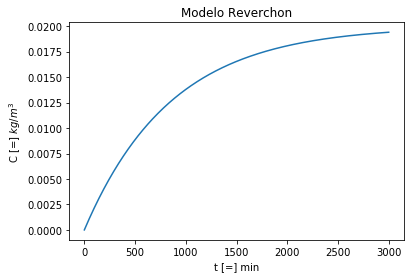

In [80]:
r = 0.31 #m
x0 = [0, 0]
t = np.linspace(0, 3000, 500)

resultado = odeint(reverchon, x0, t)

qR = resultado[:, 0]
CR = resultado[:, 1]
plt.plot(t, CR)
plt.title("Modelo Reverchon")
plt.xlabel("t [=] min")
plt.ylabel("C [=] $kg/m^3$")

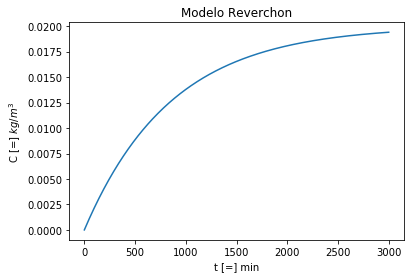

In [81]:
r = 0.231 #m
x0 = [0, 0]
t = np.linspace(0, 3000, 500)

resultado = odeint(reverchon, x0, t)

qR = resultado[:, 0]
CR = resultado[:, 1]
plt.plot(t, CR)
plt.title("Modelo Reverchon")
plt.xlabel("t [=] min")
plt.ylabel("C [=] $kg/m^3$")

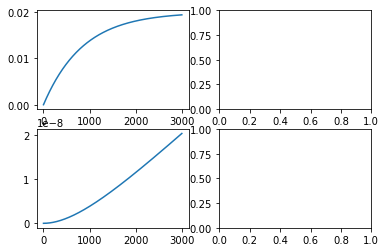

In [105]:
fig,axes=plt.subplots(2,2)
axes[0,0].plot(t,CR)
axes[1,0].plot(t,qR)


# Trabajo futuro

- Realizar modificaciones de los parametros para observar cómo afectan al comportamiento del modelo.
- Realizar un ejemplo de optimización de parámetros utilizando el modelo de Reverchon.

# Referencias

[1] E. Reverchon, Mathematical modelling of supercritical extraction of sage oil, AIChE J. 42 (1996) 1765–1771.
https://onlinelibrary.wiley.com/doi/pdf/10.1002/aic.690420627

[2] Amit Rai, Kumargaurao D.Punase, Bikash Mohanty, Ravindra Bhargava, Evaluation of models for supercritical fluid extraction, International Journal of Heat and Mass Transfer Volume 72, May 2014, Pages 274-287. https://www.sciencedirect.com/science/article/pii/S0017931014000398

# Ajuste de parámetros con ODEs: modelo Reverchon

parameter values are  [ 0.5221712  0.181713 ]


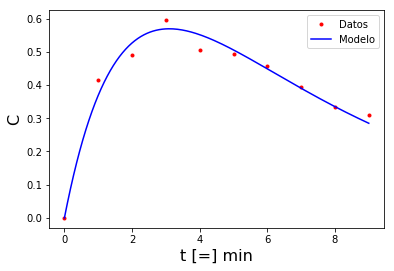

In [120]:


#Datos experimentales
x_data = np.linspace(0,9,10)
y_data = np.array([0.000,0.416,0.489,0.595,0.506,0.493,0.458,0.394,0.335,0.309])

def f(y, t, k): 
    """ sistema de ecuaciones diferenciales ordinarias """
    return (-k[0]*y[0], k[0]*y[0]-k[1]*y[1], k[1]*y[1])

def my_ls_func(x,teta):
    f2 = lambda y, t: f(y, t, teta)
    # calcular el valor de la ecuación diferencial en cada punto
    r = integrate.odeint(f2, y0, x)
    return r[:,1]

def f_resid(p):
    # definir la función de minimos cuadrados para cada valor de y"""
    
    return y_data - my_ls_func(x_data,p)

#resolver el problema de optimización
guess = [0.2, 0.3] #valores inicales para los parámetros
y0 = [1,0,0] #valores inciales para el sistema de ODEs
(c, kvg) = optimize.leastsq(f_resid, guess) #get params

print("parameter values are ",c)

# interpolar los valores de las ODEs usando splines
xeval = np.linspace(min(x_data), max(x_data),30) 
gls = interpolate.UnivariateSpline(xeval, my_ls_func(xeval,c), k=3, s=0)


xeval = np.linspace(min(x_data), max(x_data), 200)
#Gráficar los resultados
pp.plot(x_data, y_data,'.r',xeval,gls(xeval),'-b')
pp.xlabel('t [=] min',{"fontsize":16})
pp.ylabel("C",{"fontsize":16})
pp.legend(('Datos','Modelo'),loc=0)
pp.show()